<a href="https://colab.research.google.com/github/sebastianmezaurotadze/sebastianmezaurotadze/blob/main/Wind_Profile_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is some text

In [6]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_fds_lines_with_random_specials_and_unique_directions(num_lines=31, t_max=300, t_step=10):
    lines = [
        "&RAMP ID='WIND_RAMP_DIRECTION_T', T=0.0, F=0/",
        "&RAMP ID='WIND_RAMP_DIRECTION_T', T=70.0, F=0/"
    ]

    special_values = [0, 90, 180, 270]
    unique_random_values = random.sample(range(1, 360), 7)  # Generate 7 unique random directions
    all_special_values = special_values + unique_random_values
    special_indices = list(range(8, 30, 2))  # Possible indices for special values in T=80 to T=290
    random.shuffle(special_indices)  # Randomize the special value positions

    # Populate the special values consecutively with adjacent lines
    for i, val in enumerate(all_special_values):
        idx = special_indices[i]
        t1 = idx * t_step
        t2 = (idx + 1) * t_step
        lines.append(f"&RAMP ID='WIND_RAMP_DIRECTION_T', T={t1}.0, F={val}/")
        lines.append(f"&RAMP ID='WIND_RAMP_DIRECTION_T', T={t2}.0, F={val}/")

    # Generate the rest of the lines
    for i in range(num_lines):
        if i in special_indices or i + 1 in special_indices:
            continue  # Skip already populated indices for special values
        t = i * t_step
        if t < 80:
            continue  # Skip initial range
        if i % 2 == 0 and i != 0:  # Change X every other line, but not the first one
            x = random.randint(0, 360)
        else:
            if lines:
                x = int(lines[-1].split('F=')[1].rstrip('/'))
            else:
                x = random.randint(0, 360)
        line = f"&RAMP ID='WIND_RAMP_DIRECTION_T', T={t}.0, F={x}/"
        lines.append(line)

    # Sort lines by T value
    lines.sort(key=lambda line: int(line.split('T=')[1].split('.')[0]))

    return lines

# Generate the lines
fds_lines_random_specials_and_unique_directions = generate_fds_lines_with_random_specials_and_unique_directions()

# Print the lines
for line in fds_lines_random_specials_and_unique_directions:
    print(line)

&RAMP ID='WIND_RAMP_DIRECTION_T', T=0.0, F=0/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=70.0, F=0/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=80.0, F=302/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=90.0, F=302/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=100.0, F=270/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=110.0, F=270/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=120.0, F=45/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=130.0, F=45/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=140.0, F=178/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=150.0, F=178/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=160.0, F=349/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=170.0, F=349/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=180.0, F=301/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=190.0, F=301/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=200.0, F=199/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=210.0, F=199/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=220.0, F=90/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=230.0, F=90/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=240.0, F=266/
&RAMP ID='WIND_RAMP_DIRECTION_T', T=250.0, F=266/
&RAMP ID='WIN

Test

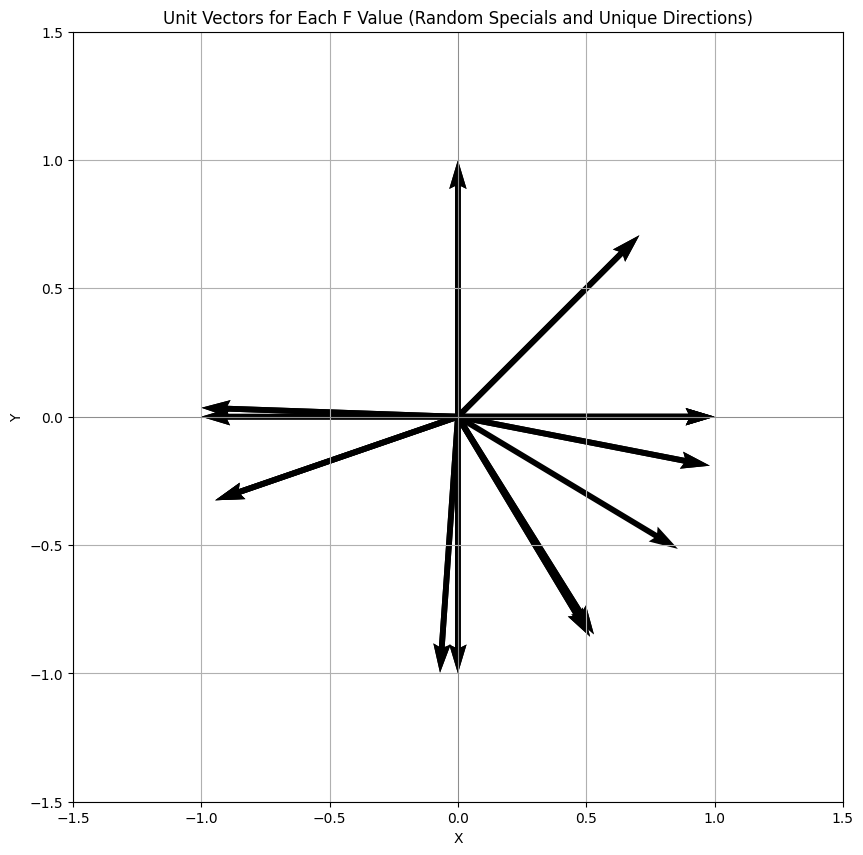

In [7]:
# Extract T and F values from the generated lines
values_random_specials_and_unique_directions = []
for line in fds_lines_random_specials_and_unique_directions:
    t_value = int(line.split('T=')[1].split('.')[0])
    f_value = int(line.split('F=')[1].rstrip('/'))
    values_random_specials_and_unique_directions.append((t_value, f_value))

# Convert to DataFrame for better display and manipulation
df_fds_values_random_specials_and_unique_directions = pd.DataFrame(values_random_specials_and_unique_directions, columns=["T", "F"])

# Plotting unit vectors for each F value
plt.figure(figsize=(10, 10))
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(True)

for index, row in df_fds_values_random_specials_and_unique_directions.iterrows():
    angle = np.deg2rad(row['F'])
    x = np.cos(angle)
    y = np.sin(angle)
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Unit Vectors for Each F Value (Random Specials and Unique Directions)')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()